In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') # remove all warning texts 

In [2]:
df = pd.read_csv('./Datasets/Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df['YearsExperience'] = df['YearsExperience'] /df['YearsExperience'] .max()  # 1

In [7]:
df['Salary'] = df['Salary'] / df['Salary'].max()

In [8]:
df

,YearsExperience,Salary
0,0.104762,0.321453
1,0.123810,0.377520
2,0.142857,0.308282
3,0.190476,0.355623
4,0.209524,0.325931
5,0.276190,0.462795
6,0.285714,0.491458
7,0.304762,0.444845
8,0.304762,0.526550
9,0.352381,0.467265


# EDA

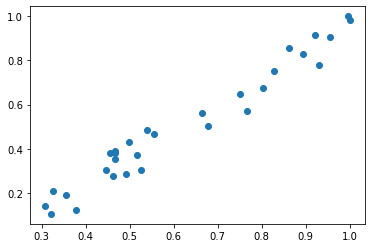

In [9]:
y = df['YearsExperience']
x = df['Salary']
plt.scatter(x, y)

(0.0, 1.0945327530820679)

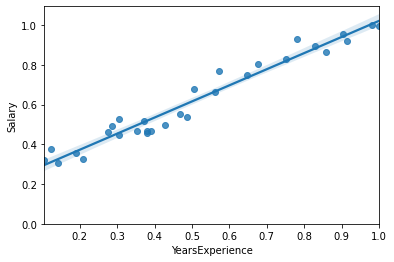

In [10]:
sns.regplot(x='YearsExperience', y='Salary', data=df)  # we have a strong positive relationship between the experience ans the salary
plt.ylim(0,)                # 2

In [11]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['YearsExperience'], df['Salary'])

In [12]:
pearson_coef  # shows there is a strong positive relationship

0.9782416184887601

In [13]:
p_value

1.1430681092269945e-20

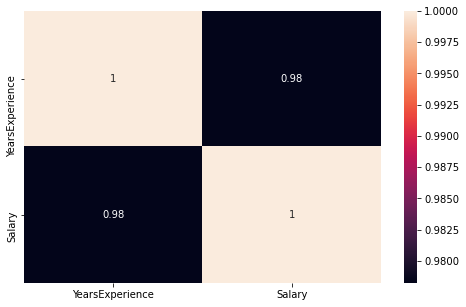

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='Salary'>

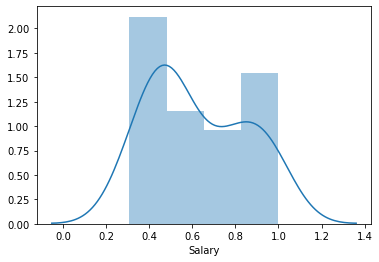

In [15]:
sns.distplot(x)

In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

<AxesSubplot:xlabel='Salary'>

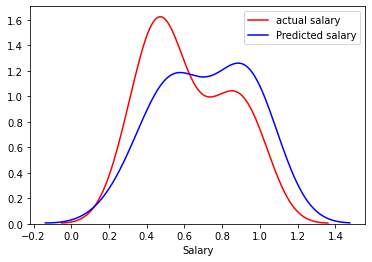

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
actual_salary = sns.distplot(df['Salary'], hist = False, color='r', label='actual salary')
sns.distplot(y_pred, hist=False, color='b', label='Predicted salary', ax=actual_salary)